# Concepts of NLP

### 1. Sentence Tokenization

In [2]:
from nltk.tokenize import word_tokenize

sentence = 'If they can do it, so can you.'

new_sentence = word_tokenize(text)

print(new_sentence)

['If', 'they', 'can', 'do', 'it', ',', 'so', 'can', 'you', '.']


### 2. Stopwords For English and French

In [8]:
from nltk.corpus import stopwords

stop_words = list(stopwords.words('english'))
print(stop_words)
print()
stop_words = list(stopwords.words('french'))
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### 3. Stemming

In [9]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

sentence_1 = 'Sachin is playing cricket'
sentence_1 = word_tokenize(sentence_1)
sentence_1 = [i for i in sentence_1 if not i in list(stopwords.words('english'))]

sentence_2 = 'Sachin played cricket'
sentence_2 = word_tokenize(sentence_2)
sentence_2 = [i for i in sentence_2 if not i in list(stopwords.words('english'))]


PS = PorterStemmer()

stemmed_sentence_1 = ''
stemmed_sentence_2 = ''

for i in sentence_1:
    stemmed_sentence_1 += PS.stem(i) + ' '

for i in sentence_2:
    stemmed_sentence_2 += PS.stem(i) + ' '

print('STEMMED SENTENCE 1:',stemmed_sentence_1, '\nSTEMMED SENTENCE 2:', stemmed_sentence_2)

STEMMED SENTENCE 1: sachin play cricket  
STEMMED SENTENCE 2: sachin play cricket 


### 4. Lemmatization

In [15]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))

cat
cactus
goose
rock
python
good
best


### 5. Classification

In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

dataset = datasets.load_iris()

model = GaussianNB()
model.fit(dataset.data, dataset.target)
expected = dataset.target
predicted = model.predict(dataset.data)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.94      0.94      0.94        50
          2       0.94      0.94      0.94        50

avg / total       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


In [16]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

topics = ['rec.autos', 'rec.sport.hockey', 'sci.space', 'soc.religion.christian', 'talk.politics.guns']

training = fetch_20newsgroups(subset = 'train', categories = topics, shuffle = True, random_state = 42)

classifier = Pipeline([
    ('vec', TfidfVectorizer(stop_words = stopwords.words('english'))),
    ('cla', MultinomialNB())
])

X_train, X_test, y_train, y_test = train_test_split(training.data, training.target, test_size = 0.2, random_state = 33)

classifier.fit(X_train, y_train)

print('Accuracy:', classifier.score(X_test, y_test))

C:\ProgramData\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Accuracy: 0.9727427597955707


In [17]:
query = ['weapons are not allowed in here']
class_type = int(classifier.predict(query))
print('For the query:',*query)
print('Class Type:',class_type)
print('Class name:', training.target_names[class_type])

print('-'*50)

query = ['thats a ferrari right?']
class_type = int(classifier.predict(query))
print('For the query:',*query)
print('Class Type:',class_type)
print('Class name:', training.target_names[class_type])

For the query: weapons are not allowed in here
Class Type: 4
Class name: talk.politics.guns
--------------------------------------------------
For the query: thats a ferrari right?
Class Type: 0
Class name: rec.autos


### 6. Hierarchical Clustering

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75]],
 'dcoord': [[0.0, 1.7320508075688772, 1.7320508075688772, 0.0],
  [0.0, 2.0, 2.0, 1.7320508075688772],
  [0.0, 2.23606797749979, 2.23606797749979, 2.0],
  [0.0, 2.449489742783178, 2.449489742783178, 2.23606797749979]],
 'ivl': [3, 5, 4, 1, 2],
 'leaves': [2, 4, 3, 0, 1],
 'color_list': ['b', 'b', 'b', 'b']}

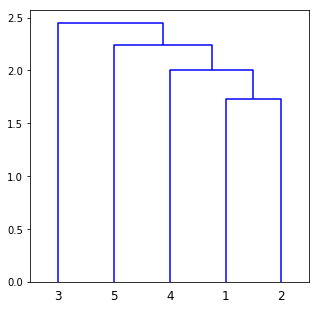

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

sentence_1 = 'sachin play'.split()
sentence_2 = 'sachin father aditya'.split() 
sentence_3 = 'sachin and virat play india'.split()
sentence_4 = 'dhoni work office'.split()
sentence_5 = 'dravid study school'.split()


terms = sorted(list(set(sentence_1 + sentence_2 + sentence_3 + sentence_4 + sentence_5)))

# Generating the term frequency matrix.
term_doc = [[0 for i in range(len(terms))] for j in range(5)]

doc_no = 0

# Iterating over the documents
for i in [sentence_1, sentence_2, sentence_3, sentence_4, sentence_5]:
    term_doc[doc_no] = [i.count(j) for j in terms]
    doc_no += 1


X = np.array(term_doc)

linked = linkage(X, 'single')

lo = 1
hi = np.shape(X)[0] + 1

labelList = range(lo, hi)

plt.figure(figsize = (hi-lo, 5))
dendrogram(linked,
          orientation = 'top',
          labels = labelList,
          distance_sort = 'descending',
          show_leaf_counts=True)
